In [14]:
import data_preprocessing
from data_preprocessing import*
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,plot_confusion_matrix
from sklearn.pipeline import Pipeline
import nltk
import seaborn as sns
import nltk.corpus 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
trainPath='/home/siva/Desktop/ml/liar_dataset/train.tsv'
testPath='/home/siva/Desktop/ml/liar_dataset/test.tsv'
validationPath='/home/siva/Desktop/ml/liar_dataset/valid.tsv'

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
train,y,test,testY,val,valY=data_preprocess(trainPath,testPath,validationPath,pred="single")

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
list(testY).count(0)

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


680

In [18]:
countV = CountVectorizer()

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# SVM with CountVectorizer

In [19]:
svm_pipeline = Pipeline([
        ('svmCV',countV),
        ('svm_clf',svm.LinearSVC())
        ])

svm_pipeline.fit(train,y)
predicted_svm = svm_pipeline.predict(test)

print("Accuracy :", np.mean(predicted_svm == testY))
print(classification_report(testY, predicted_svm))

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy : 0.6928487690504103
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       680
           1       0.24      0.23      0.23       173

    accuracy                           0.69       853
   macro avg       0.52      0.52      0.52       853
weighted avg       0.69      0.69      0.69       853



/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# SVM with Stochastic Gradient Descent  with hinge loss

In [20]:
sgd_pipeline = Pipeline([
        ('svm2CV',countV),
        ('svm2_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))
        ])

sgd_pipeline.fit(train,y)
predicted_sgd = sgd_pipeline.predict(test)
print("Accuracy :", np.mean(predicted_sgd == testY))


Accuracy : 0.7901524032825322


/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
print(classification_report(testY, predicted_sgd))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88       680
           1       0.00      0.00      0.00       173

    accuracy                           0.79       853
   macro avg       0.40      0.50      0.44       853
weighted avg       0.63      0.79      0.70       853



/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# ConfusionMatrix Generator

In [22]:
def confusionMatrix(testset,predicted):
    #Confusion matrix
    print("======Confusion Matrix======")
    matrix = confusion_matrix(testset,predicted)
    print('\n',matrix)

    pd.crosstab(np.array(predicted), np.array(testset), rownames=['Actual'], colnames=['Predicted'], margins=True)

    p = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Confusion Matrix for SVM

======Confusion Matrix======

 [[551 129]
 [133  40]]


/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


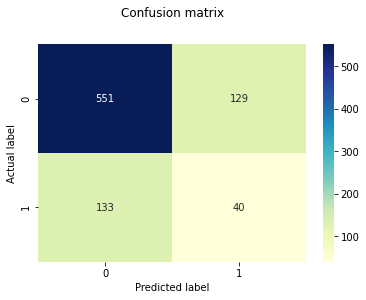

In [23]:

confusionMatrix(testY,predicted_svm)

# Confusion matrix for SVM with SGD

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


======Confusion Matrix======

 [[674   6]
 [173   0]]


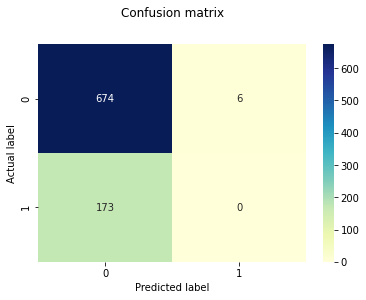

In [24]:
confusionMatrix(testY,predicted_sgd)

# To enhance frequency used term frequency weights with n-gram range

In [25]:
tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Linear SVM with n-gram

In [26]:
#linear SVM classifier
svm_pipeline_ngram = Pipeline([
        ('svm_tfidf',tfidf_ngram),
        ('svm_clf',svm.LinearSVC())
        ])

svm_pipeline_ngram.fit(train,y)
predicted_svm_ngram = svm_pipeline_ngram.predict(test)
print("Accuracy :",np.mean(predicted_svm_ngram == testY))

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy : 0.7784290738569754


In [27]:
print(classification_report(testY, predicted_svm_ngram))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       680
           1       0.31      0.08      0.12       173

    accuracy                           0.78       853
   macro avg       0.56      0.52      0.50       853
weighted avg       0.70      0.78      0.72       853



/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Linear SVM with SGD n-gram

In [28]:
#sgd classifier
sgd_pipeline_ngram = Pipeline([
         ('sgd_tfidf',tfidf_ngram),
         ('sgd_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))
         ])

sgd_pipeline_ngram.fit(train,y)
predicted_sgd_ngram = sgd_pipeline_ngram.predict(test)

print("Accuracy : ",np.mean(predicted_sgd_ngram == testY))

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy :  0.7971864009378663


## Confusion matrix for Linear SVM with n-gram

======Confusion Matrix======

 [[651  29]
 [160  13]]


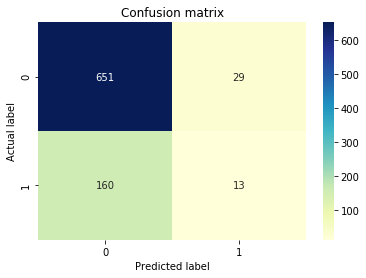

In [120]:
confusionMatrix(testY,predicted_svm_ngram)

## Confusion Matrix for Linear SVM with SGD n-gram

======Confusion Matrix======

 [[680   0]
 [173   0]]


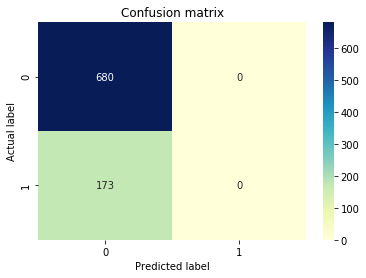

In [80]:
confusionMatrix(testY,predicted_sgd_ngram)